In [ ]:
import pandas as pd
import nltk
import re
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df = pd.read_csv('https://query.data.world/s/f6mpgpemxezb5x7khra3tlursrlqlf?dws=00000')
df.head()

In [ ]:
def preprocess_review(review):
    review = re.sub(r'[^\w\s]', '', review)# removing punctuation
    review = review.lower()# Converting to Lowercase

    stop_words = set(stopwords.words('english'))#Removing Stop Words
    word_tokens = word_tokenize(review)#tokenizing the preprocessed review text
    filtered_review = [w for w in word_tokens if w not in stop_words]#creating a new list that contains only the non-stop words

    lemmatizer = WordNetLemmatizer()#an instance of the WordNetLemmatizer class
    lemmatized_review = [lemmatizer.lemmatize(w) for w in filtered_review]#Stores the lemmatized form of each word in filtered_review using a list comprehension

    preprocessed_review = ' '.join(lemmatized_review)#joins the lemmatized words back into a single string with spaces between them

    return preprocessed_review

In [ ]:
preprocessed_review = [preprocess_review(str(review)) for review in df['review_text']]#preprocessing each review text and collects the preprocessed results into a list

In [ ]:
sia = SentimentIntensityAnalyzer()#instance of the SentimentIntensityAnalyzer class from NLTK

sentiment_scores = []#creates an empty list
for review in preprocessed_review:
    score = sia.polarity_scores(review)#method computes a sentiment score for the review, including scores for negative, neutral, positive, and compound sentiments
    sentiment_scores.append(score)#dictionary containing the sentiment scores for the current review

sentiment_df = pd.DataFrame(sentiment_scores, columns=['neg', 'neu', 'pos', 'compound'])

print(sentiment_df.head())

     neg    neu    pos  compound
0  0.067  0.463  0.469    0.9188
1  0.058  0.858  0.083    0.2240
2  0.000  0.256  0.744    0.4404
3  0.000  0.000  1.000    0.6249
4  0.055  0.945  0.000   -0.4588


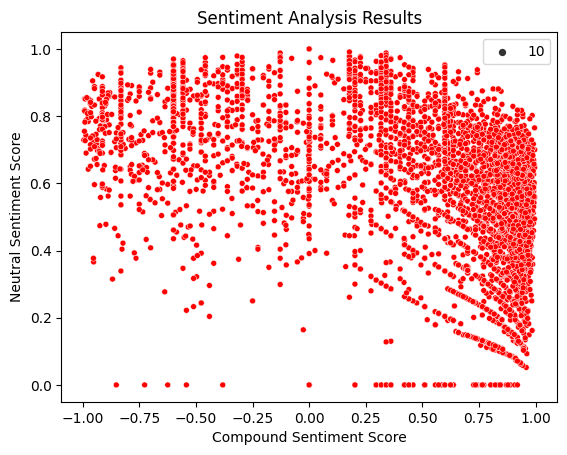

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    data = sentiment_df,
    x = 'compound',
    y = 'neu',
    color = 'red',
    size = 10,
    marker = 'o',
)

plt.title('Sentiment Analysis Results')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Neutral Sentiment Score')
plt.show()

In [ ]:
df = pd.read_csv('https://query.data.world/s/f6mpgpemxezb5x7khra3tlursrlqlf?dws=00000')
# Preprocessing
df["sentiment"] = df["review_rating"].apply(lambda rating: "positive" if rating > 3 else "negative" if rating < 3 else "neutral")
X = df["review_text"]
y = df["sentiment"]

In [ ]:
#Naive Bayes model

# Replace NaN values with empty strings.
df["review_text"].replace(np.nan, "", inplace=True)

# Create a vocabulary of words.
vectorizer = CountVectorizer()
vectorizer.fit(df["review_text"])

# Train a Naive Bayes model on the dataset.
model = MultinomialNB()
model.fit(vectorizer.transform(df["review_text"]), df["sentiment"])

# Predict the polarity of new reviews.
predictions = model.predict(vectorizer.transform(df["review_text"]))

# Print the prediction.
#for index, prediction in enumerate(predictions):
 #   print(f"Review {index}: {df.loc[index, 'review_text']} ({prediction})")
for index in np.argsort(predictions)[:5]:
  print(f"Review {index}: {df.loc[index, 'review_text']} ({predictions[index]})")

Review 3713: un  de mais 2 souliers avait un cordon avec un big noeud j ai du couper le cordon tellement le noeuf était serré et erreur de couture pas ma meilleure achat (negative)
Review 1217: This shoe doesn't actually have the velcro strap, as it appears to have in the product image.If your child is like mine and not the best at tying their shoes yet, then you know that the velcro strap really comes in handy (which is the main reason why I selected this shoe to purchase), so needless to say, I was pretty disappointed that the product image was inaccurate.Other than that though, it's a good shoe and we decided to go ahead and keep it and continue perfecting our shoe-tying skills. (negative)
Review 4448: I had the Realflex 4.0 Cross Trainers and they worked great.  The 5.0 version is completely different.  I ordered the same size as the 4.0 (7.5) and it was about 1/2 inch longer measuring side by side and much narrower.They are very cute and will wear them for running short errands bu

In [ ]:
#Support vector machines (SVM)
import numpy as np
import pandas as pd
from sklearn.svm import SVC

# Replace NaN values with empty strings.
df["review_text"].replace(np.nan, "", inplace=True)

# Create a vocabulary of words.
vectorizer = CountVectorizer()
vectorizer.fit(df["review_text"])

# Train a SVM model on the dataset.
model = SVC()
model.fit(vectorizer.transform(df["review_text"]), df["sentiment"])

# Predict the polarity of new reviews.
predictions = model.predict(vectorizer.transform(df["review_text"]))

# Print the polarity values.
for index in np.argsort(predictions)[:5]:
  print(f"Review {index}: {df.loc[index, 'review_text']} ({predictions[index]})")

Review 5673: The shoes are too hard to walk on.. they don't even bent so I don't understand how is comfortable to run on them. Not a good choice for a toddler. (negative)
Review 5313: Las playeras son bonitas, pero son duras, las suelas no son flexibles. Parecen no ser tan cómodas. Las he comprado para mi bebé de 2 años, una talla 24, una más de la q lleva normalmente. El no se queja, pero igual es pq las lleva un poco grandes... comparando estas con las que tiene mi hijo de puma y adidas, las rebook me parecen bastante malas, al menos este modelo que le he comprado. No volvería a comprarlas. (negative)
Review 1746: I admit I bought these shoes because they look so cool and I've always loved Reebok's comfort.  And when I first put them on, I loved them.  But after walking around the house for an hour or so, they felt so tight!  The fabric really didn't stretch even as much as leather might.  I bought an 8 1/2, which is 1/2 size larger than I normally buy, so I didn't feel comfortable m

In [ ]:
#Decision trees
from sklearn.tree import DecisionTreeClassifier

# Replace NaN values with empty strings.
df["review_text"].replace(np.nan, "", inplace=True)

# Create a vocabulary of words.
vectorizer = CountVectorizer()
vectorizer.fit(df["review_text"])

# Train a decision tree model on the dataset.
model = DecisionTreeClassifier()
model.fit(vectorizer.transform(df["review_text"]), df["sentiment"])

# Predict the polarity of new reviews.
predictions = model.predict(vectorizer.transform(df["review_text"]))

# Print the prediction of top 5 reviews.
for index in np.argsort(predictions)[:5]:
  print(f"Review {index}: {df.loc[index, 'review_text']} ({predictions[index]})")

Review 5351: Awful, they hurt my feet! I thought once they were broken in they would feel better but nothing has changed. Others have tried them & agree that they kill the feet. (negative)
Review 2304: El envío tardó menos de lo esperado pero la caja venía en una bolsa y la caja estaba en un mal estado, los tenis no me quedaron bien por tener el empeine alto. (negative)
Review 6146: Chaussures très jolies mais qui s’abiment dès la première utilisation au niveau de la pliure du pied sur les côtés. Extrêmement déçue par la marque, aussi bien ma fille que moi nous n’usons pas nos chaussures, celle la, elles sont bonnes pour la poubelle en très peu d’utilisation. Vu le prix de base des chaussures ça fait mal au cœur d’avoir des chaussures à usage unique. @Victoria s’est loupé dans la fabrication de ce modèle. Nous l’avons en gris et en noir toutes les 2, je regrette vraiment mes achats. (negative)
Review 5084: I was hoping for good arch support and these do NOT have much. My feet were hurt

In [ ]:
#Random forests
from sklearn.ensemble import RandomForestClassifier

# Replace NaN values with empty strings.
df["review_text"].replace(np.nan, "", inplace=True)

# Create a vocabulary of words.
vectorizer = CountVectorizer()
vectorizer.fit(df["review_text"])

# Train a random forest model on the dataset.
model = RandomForestClassifier()
model.fit(vectorizer.transform(df["review_text"]), df["sentiment"])

# Predict the polarity of new reviews.
predictions = model.predict(vectorizer.transform(df["review_text"]))

# Print the prediction of top 5 reviews.
for index in np.argsort(predictions)[:5]:
  print(f"Review {index}: {df.loc[index, 'review_text']} ({predictions[index]})")

Review 1233: Cerniera rotta dopo averle indossate 5 volte (negative)
Review 1331: This shoe doesnt come in half sizes. I bought 2. The smaller one is too small and the larger is too large. Both very uncomfortable bc of this. A shame for an attractive shoe. (negative)
Review 5820: Die Sohle der Schuhe ist viel zu hart, ich weiß nicht wer solche Kinderschuhe herstellt. Ich habe sie kein bisschen gebogen bekommen. Das Design an sich ist schön. (negative)
Review 4479: Wir können vom Kauf dieser Schuhe nur abraten. Unsere Tochter hat sie vielleicht 20 Mal getragen, nun habe ich ein nicht sehr kleines Loch in der Sohle entdeckt. Die Sohle scheint nicht aus "einem Guss" zu sein, sondern die unterschiedlichen Farben sind anscheinend "zusammengefügt", zwischen Schwarz und Türkis löst sie sich  nun auf.Wir hatten die Schuhe eigentlich gekauft, da sie laut Produktbeschreibung wasserabweisend sein sollen. Leider ist das nicht der Fall, selbst bei leichtem Nieselregen werden die Socken auf dem 10-m

In [ ]:
df = pd.read_csv('https://query.data.world/s/f6mpgpemxezb5x7khra3tlursrlqlf?dws=00000')
# Preprocessing
df["sentiment"] = df["review_rating"].apply(lambda rating: "positive" if rating > 3 else "negative")
X = df["review_text"]
y = df["sentiment"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature extraction
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train.astype('U'))  # Convert to Unicode
X_test_vectors = vectorizer.transform(X_test.astype('U'))  # Convert to Unicode


# Train and evaluate models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'Support Vector Machine': LinearSVC(max_iter=10000),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

for model_name, model in models.items():
    model.fit(X_train_vectors, y_train)
    y_pred = model.predict(X_test_vectors)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy}')

Logistic Regression Accuracy: 0.8813186813186813
Naive Bayes Accuracy: 0.8564102564102564
Support Vector Machine Accuracy: 0.865934065934066
Random Forest Accuracy: 0.8227106227106227
K-Nearest Neighbors Accuracy: 0.7743589743589744


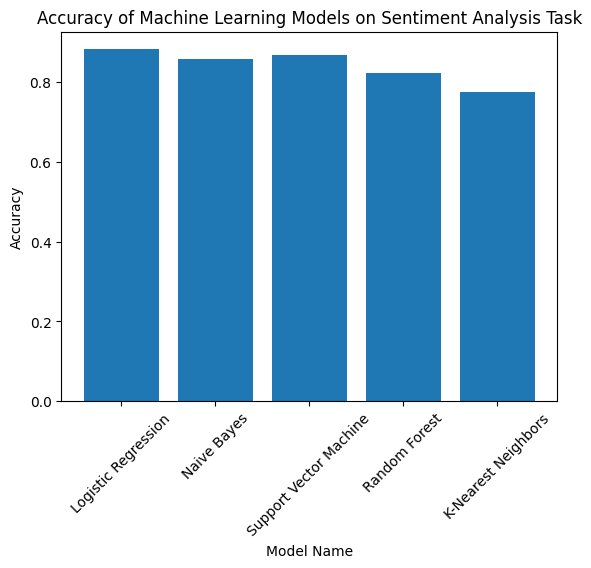

In [ ]:
import matplotlib.pyplot as plt

# Create a bar chart of the accuracy of each model
accuracies = [model.score(X_test_vectors, y_test) for model_name, model in models.items()]
plt.bar(models.keys(), accuracies)

# Set the chart title and labels
plt.title('Accuracy of Machine Learning Models on Sentiment Analysis Task')
plt.xlabel('Model Name')
plt.ylabel('Accuracy')

# Rotate the x-axis labels to prevent overlapping
plt.xticks(rotation=45)

# Show the plot
plt.show()
